<a href="https://colab.research.google.com/github/murade29/Hotel_Booking_Analysis-Capstone-Project/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!**

## **This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.**

## **Explore and analyze the data to discover important factors that govern the bookings.**

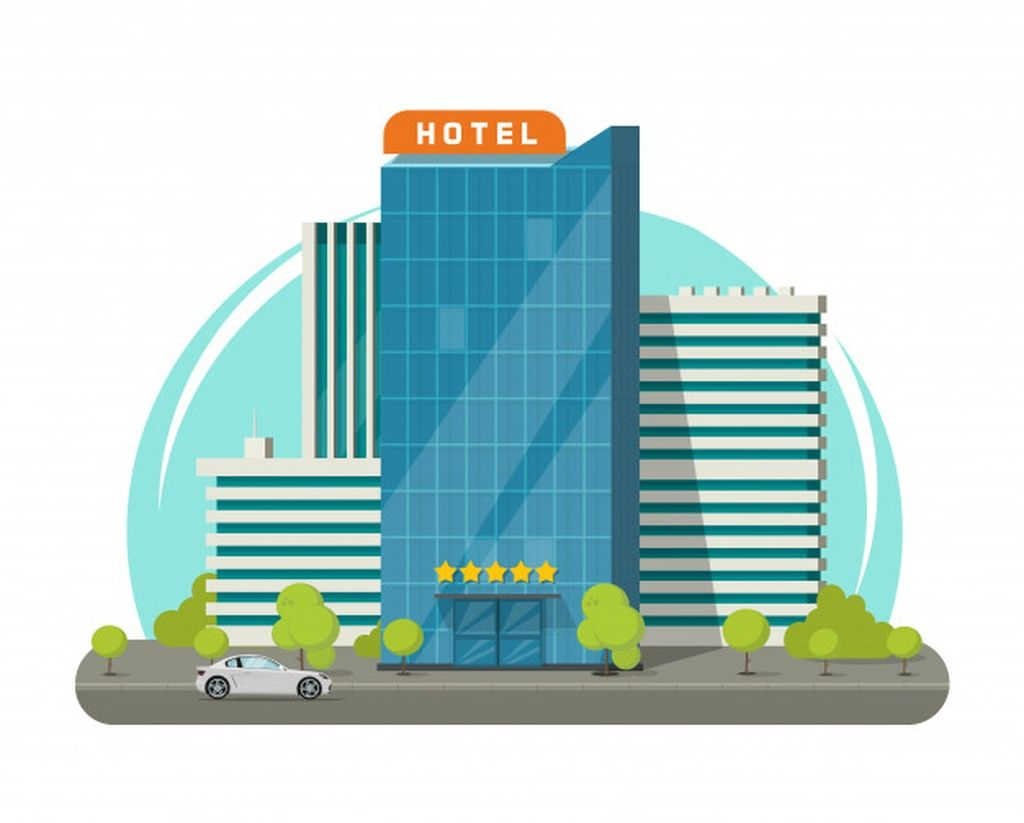

#**Initial Steps**

##**Importing Libraries and the Dataset**

In [ ]:
# Importing required libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Defining url of saved csv file
url = 'https://drive.google.com/uc?id=1C9AxF9fcVzMw0Bgs0NaRrNML2WwX1Ehm'

# Importing dataset to create a dataframe
df = pd.read_csv(url)

##**Dataset Exploration and Identification**

In [ ]:
# Checking shape pf dataframe
df.shape

(119390, 32)

In [ ]:
# Checking top 5 records in dataframe
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Checking bottom 5 records in dataframe
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#Check all the coloumns present in our dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#### **Columns and their meaning**
0. hotel 
>Hotel (Resort Hotel or City Hotel).

1. is_canceled
>Value indicating if the booking was canceled (1) or not (0).

2. lead_time
>Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

3. arrival_date_year
>Year of arrival date.

4. arrival_date_month
>Month of arrival date.

5. arrival_date_week_number
>Week number of year for arrival date.

6. arrival_date_day_of_month
>Day of arrival date.

7. stays_in_weekend_nights
>Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.

8. stays_in_week_nights
>Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.

9. adults
>Number of adults.

10. children
>Number of children.

11. babies
>Number of babies.

12. meal
>Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner).

13. country
>Country of origin. Categories are represented in the ISO 3155–3:2013 format.

14. market_segment
>Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.

15. distribution_channel
>Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.

16. is_repeated_guest
>Value indicating if the booking name was from a repeated guest (1) or not (0).

17. previous_cancellations
>Number of previous bookings that were cancelled by the customer prior to the current booking.

18. previous_bookings_not_canceled
>Number of previous bookings not cancelled by the customer prior to the current booking.

19. reserved_room_type
>Code of room type reserved. Code is presented instead of designation for anonymity reasons.

20. assigned_room_type
>Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

21. booking_changes
>Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.

22. deposit_type
>Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

23. agent
>ID of the travel agency that made the booking.

24. company
>ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.

25. days_in_waiting_list
>Number of days the booking was in the waiting list before it was confirmed to the customer.

26. customer_type
>Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking.

27. adr
>Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.

28. required_car_parking_spaces
>Number of car parking spaces required by the customer.

29. total_of_special_requests
>Number of special requests made by the customer (e.g. twin bed or high floor).

30. reservation_status
>Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why.

31. reservation_status_date
>Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.



Looks like we have quite alot of data to work with

In [ ]:
#Lets see numeric features in our dataset
numeric_features= df.describe().columns
print(numeric_features)
print(len(numeric_features))

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')
20


In [ ]:
#Lets see Categorical features in our dataset
categorical_features= df.describe(include=['object']).columns
print(categorical_features)
print(len(categorical_features))

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')
12


In [ ]:
#To check for null values and datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Unique hotels name, categorical
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df['is_canceled'].unique() #Categorical, 0-> False(booking not cancelled) & 1-> True(is cancelled)

array([0, 1])

In [ ]:
df['arrival_date_year'].unique() #All years

array([2015, 2016, 2017])

In [ ]:
df['arrival_date_month'].unique() #All months present

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [ ]:
df.market_segment.value_counts() #Counts of different market segments

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [ ]:
df.distribution_channel.value_counts() #Also the count of different distribution channels as well

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [ ]:
df.is_repeated_guest.value_counts() 
#1->> indicates the booking has been done made by same guests
#0->> indicates the booking has been made by unique guests(different)

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

In [ ]:
df.customer_type.unique() #customer types present

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [ ]:
df.customer_type.value_counts() #count of various customer types

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

##**Missing Values Treatment**

In [ ]:
#Missing data counts and percentage
missing = df.columns[df.isnull().any()].tolist()

print('Missing Data Count')
print(df[missing].isnull().sum().sort_values(ascending = False))
print('--'*12)
print('Missing Data Percentage')
print(round(df[missing].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
company     112593
agent        16340
country        488
children         4
dtype: int64
------------------------
Missing Data Percentage
company     94.31
agent       13.69
country      0.41
children     0.00
dtype: float64


In [ ]:
# Removing features with over 50% of its observations missings
df.drop(['company'],axis = 1,inplace=True)

In [ ]:
# If no id of children,agent or company is null,replace it with 0
df[['children','agent']] = df[['children','agent']].fillna(0)

In [ ]:
# For the missing values in the country column, replace it with mode (value that appears most often)
df['country'] = df['country'].fillna(df.country.mode())

In [ ]:
# Removing rows where total member arrived is none
df = df.loc[(df.adults+df.babies+df.children)!=0]

In [ ]:
#again check the shape
df.shape

(119210, 31)

See after dropping company column, we have 119210 rows and 31 columns out of 119390 rows and 32 columns in our dataset after handling the missing values.

In [ ]:
#We see various factors in our dataset like mean, median, mode etc
df.describe(include= 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119210,119210.000000,119210.000000,119210.000000,119210,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,...,119210.000000,119210,119210.000000,119210.000000,119210,119210.000000,119210.000000,119210.000000,119210,119210
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,NaN,3,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,NaN,No Deposit,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79163,NaN,NaN,NaN,13861,NaN,NaN,NaN,NaN,NaN,...,NaN,104461,NaN,NaN,89476,NaN,NaN,NaN,75011,1460
mean,NaN,0.370766,104.109227,2016.156472,NaN,27.163376,15.798717,0.927053,2.499195,1.859206,...,0.218799,NaN,74.889078,2.321215,NaN,101.969092,0.062553,0.571504,NaN,NaN
std,NaN,0.483012,106.875450,0.707485,NaN,13.601107,8.781070,0.995117,1.897106,0.575186,...,0.638504,NaN,107.168884,17.598002,NaN,50.434007,0.245360,0.792876,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,NaN,7.000000,0.000000,NaN,69.500000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,NaN,9.000000,0.000000,NaN,94.950000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,161.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,0.000000,NaN,152.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


Minimum lead time_time '0' and maximum is '737' i.e. the time between the date of booking and the arrival date is minimum '0' and maximum '737'. Which means the maximum is around '2' years.

Similarly, we have mean value 27.16 and median(50%) is 28 of 'arrival_date_week_num' column i.e. this column is near about symmetric and hence we can say that this column is important column in our dataset.

##**Handling Outlier**

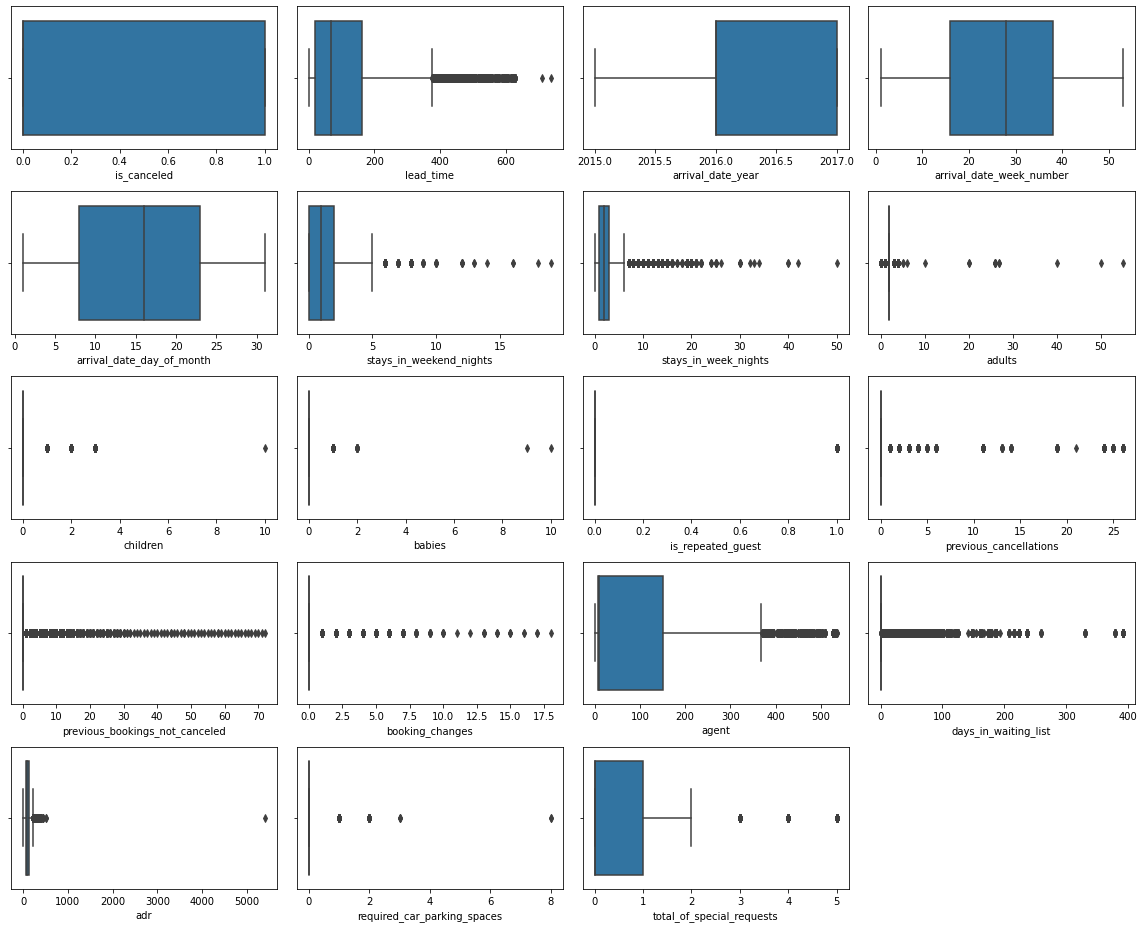

In [ ]:
# Visualization is the easiest way to have an inference about the overall data and the outliers.
n = 1
plt.figure(figsize=(16,13))
for column in df.describe().columns:
  plt.subplot(5, 4, n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

In [ ]:
# Copy the dataset
new_df = df.copy()

# First Removing outliers by defining threshold based on common understanding
new_df.loc[new_df.stays_in_weekend_nights > 5,'stays_in_weekend_nights'] = 5
new_df.loc[new_df.stays_in_week_nights > 10,'stays_in_week_nights'] = 10
new_df.loc[new_df.adults > 4, 'adults'] = 4
new_df.loc[new_df.children > 3, 'children'] = 3
new_df.loc[new_df.babies > 3,'babies'] = 3
new_df.loc[new_df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
new_df.loc[new_df.previous_cancellations > 0, 'previous_cancellations'] = 1
new_df.loc[new_df.booking_changes > 5, 'booking_changes'] = 5
new_df.loc[new_df.required_car_parking_spaces > 3, 'required_car_parking_spaces'] = 3

In [ ]:
# Removing outliers by standard methods and Plotting graphs:
for col in ['lead_time','adr','days_in_waiting_list']:
  # Using IQR method and capping to define the range of inliners:
  lower_cap, q1, q3, upper_cap, median = df[col].quantile([0.01,0.25,0.75,0.99,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value and Capping
  new_df[col] = np.where(new_df[col] > upper_limit, median,np.where(
                         new_df[col] < lower_limit,median,np.where(
                         new_df[col] < lower_cap,lower_cap,np.where(
                         new_df[col] > upper_cap,upper_cap,new_df[col]))))

In [ ]:
# Some columns have numeric values but those are actually categorical
categorical_features=["hotel","arrival_date_month","meal","country","market_segment","is_canceled",
                      "distribution_channel","reserved_room_type","assigned_room_type","deposit_type",
                      "customer_type","reservation_status","is_repeated_guest",'same_room','reservation_status_date',
                      'arrival_date_year','arrival_date_day_of_month','agent','company']

numeric_features = [i for i in df.columns if i not in categorical_features]
print(numeric_features)

['lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


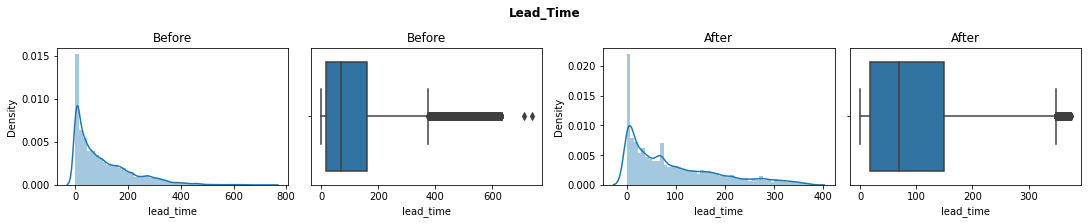

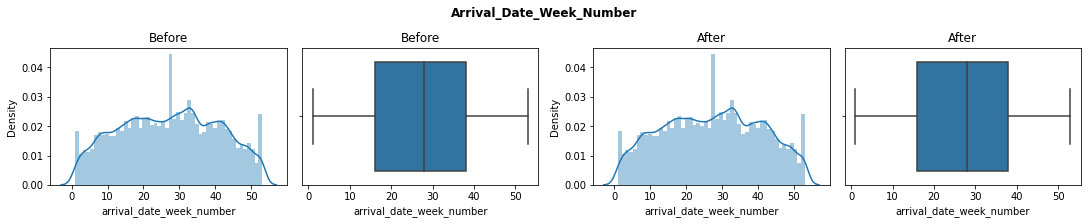

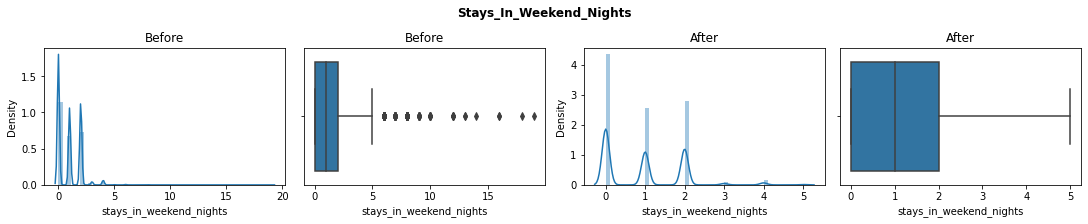

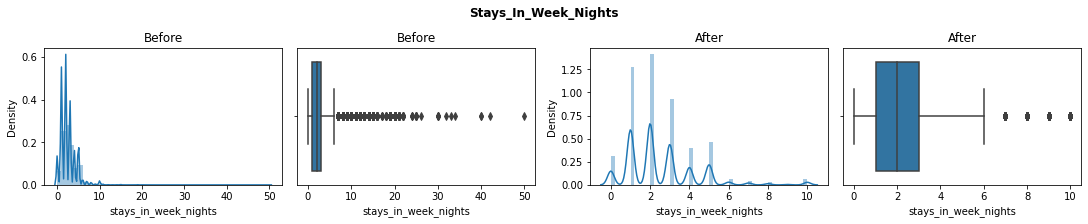

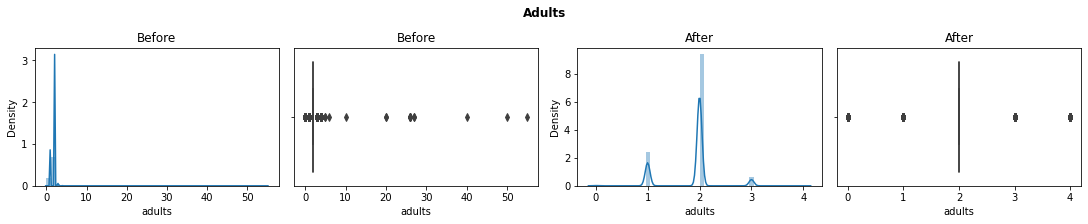

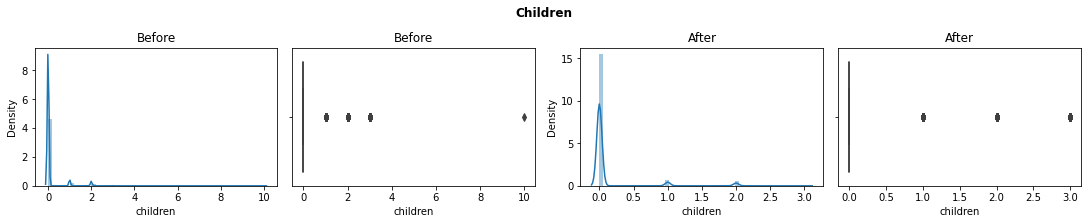

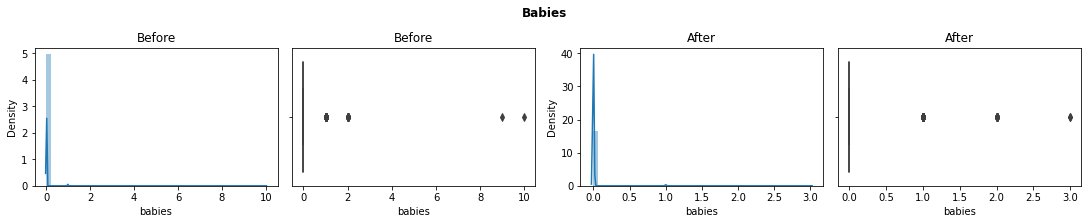

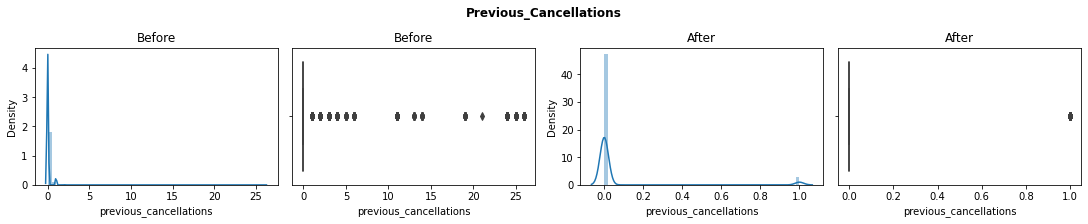

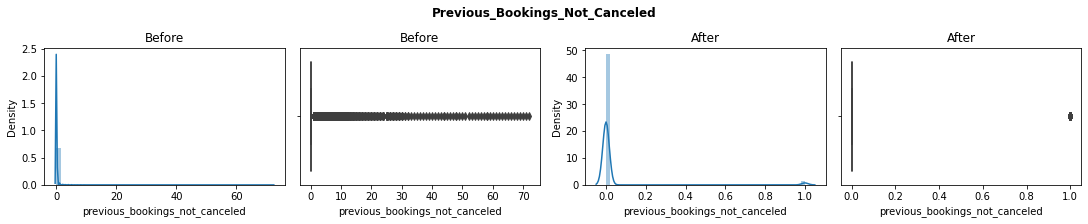

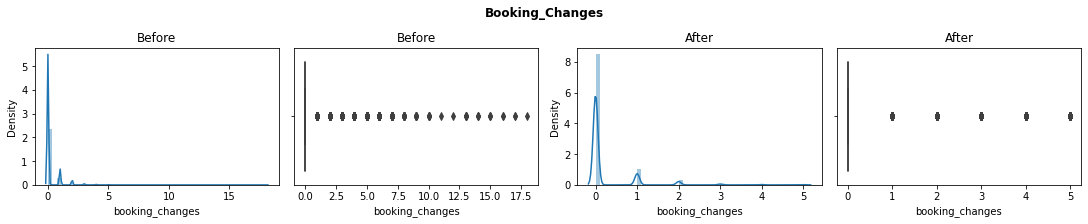

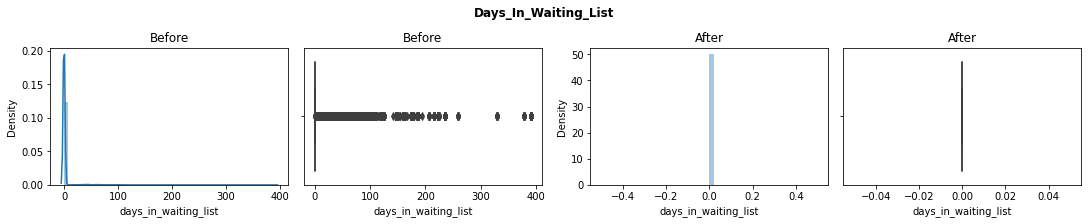

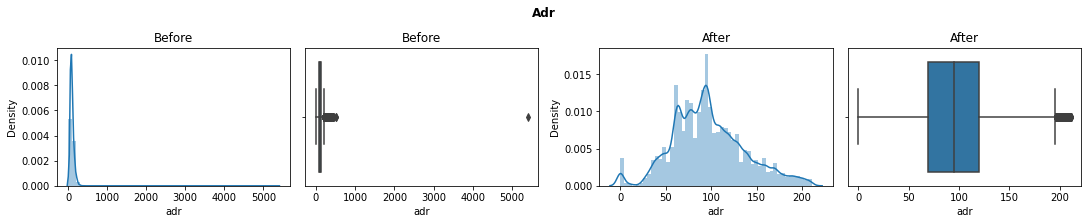

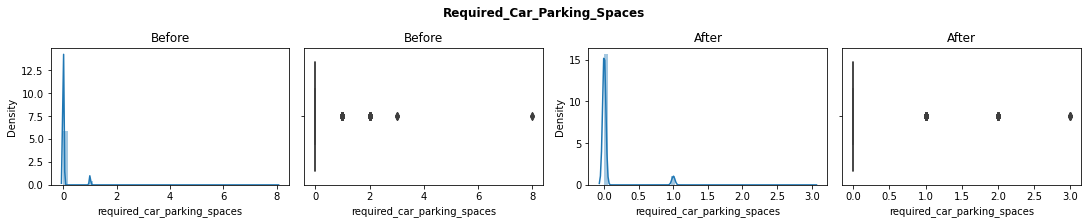

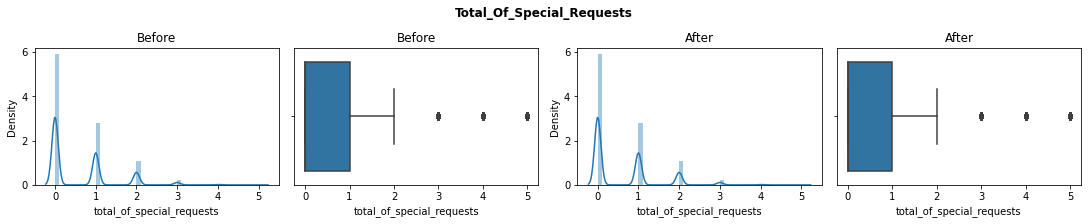

In [ ]:
#Plotting Graphs Before treating outliers 
for col in numeric_features:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(df[col], ax=ax[0]).set(title="Before")
  sns.boxplot(df[col], ax=ax[1]).set(title="Before")
  
# After treating outliers
  sns.distplot(new_df[col], ax=ax[2]).set(title="After")
  sns.boxplot(new_df[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

As we can see that most of the outliers for almost all of the parameters are more than the upper limit.

Hence , we have chosen to replace the outliers by the value on the right whisker of the box plot.

Another option was to remove the rows with outlier values,

but that will reduce the data set by almost 70%.

We can lose a lot of valueable information that way.

Hence, we remove the outliers by using conditionals to get and update these values.

##**Cleaning and Manipulating dataset**

In [ ]:
# Checking duplicates
print(len(new_df[new_df.duplicated()]))

32052


In [ ]:
# Removing duplicates
new_df.drop_duplicates(inplace=True)

# Checking Shape after removing duplicates
new_df.shape

(87158, 31)

In [ ]:
# Converting the datatype of relevant columns from float to integer
new_df[['children','agent','adr']] = new_df[['children','agent','adr']].astype('int64')

In [ ]:
# Creating some new features
new_df['same_room'] = np.where(new_df['reserved_room_type']==new_df['assigned_room_type'], 'yes', 'no')
new_df['total_children'] = new_df['children'] + new_df['babies']
new_df['total_members'] = new_df['total_children'] + new_df['adults']
new_df["total_nights"] = new_df['stays_in_weekend_nights'] + new_df['stays_in_week_nights']
new_df['money_per_person']   = new_df['adr'] * new_df['total_nights'] / new_df['total_members']
new_df['guest_type']= np.where(new_df['total_members']==1,'single',
                      np.where(new_df['total_members']==2,'couple','family'))
new_df['lead_time_category']= np.where(new_df.lead_time<15,'low',
                              np.where((new_df.lead_time>15)&(new_df.lead_time<90),'medium','high'))

In [ ]:
new_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_children,total_members,total_nights,money_per_person
count,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,...,87158.000000,87158.000000,87158.0,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000
mean,0.275201,77.719028,2016.210422,26.833968,15.817596,0.999243,2.601104,1.875858,0.138840,0.010705,...,0.263866,81.079385,0.0,99.805755,0.084215,0.699110,0.149545,2.025402,3.600346,186.023545
std,0.446618,81.206947,0.686093,13.669435,8.835813,0.993225,1.889426,0.505131,0.455141,0.105224,...,0.660556,109.965833,0.0,42.221784,0.279482,0.831972,0.469119,0.700875,2.540027,160.638079
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,9.000000,0.0,72.000000,0.000000,0.000000,0.000000,2.000000,2.000000,82.500000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,9.000000,0.0,94.000000,0.000000,0.000000,0.000000,2.000000,3.000000,147.500000
75%,1.000000,123.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,240.000000,0.0,126.000000,0.000000,1.000000,0.000000,2.000000,5.000000,237.000000
max,1.000000,375.000000,2017.000000,53.000000,31.000000,5.000000,10.000000,4.000000,3.000000,3.000000,...,5.000000,535.000000,0.0,210.000000,3.000000,5.000000,3.000000,5.000000,15.000000,2550.000000


In [ ]:
# days_in_waiting_list has all zeros in it after outlier treatment. Hence We can drop it.
new_df.days_in_waiting_list.value_counts()

0.0    87158
Name: days_in_waiting_list, dtype: int64

In [ ]:
# dropping the columns since we merged both the columns as total_children
new_df.drop(['children','babies','previous_bookings_not_canceled','assigned_room_type','days_in_waiting_list'],axis = 1,inplace=True)

In [ ]:
# Making a list of features where number of unique values <= 2
boolean_features = [i for i in new_df.columns if len(new_df[i].value_counts()) <= 2]

# Converting boolean columns from int to object
new_df[boolean_features] = new_df[boolean_features].replace([0,1],['No','Yes'])

In [ ]:
# Treating arrival_date_month column for better plot
new_df['arrival_date_month'] = new_df['arrival_date_month'].replace(
                                  {'July': 'Jul', 'August': 'Aug', 'September': 'Sep',
                                  'October': 'Oct', 'November': 'Nov','December': 'Dec',
                                  'January': 'Jan', 'February': 'Feb', 'March': 'Mar',
                                  'April': 'Apr', 'May': 'May', 'June': 'Jun'})

In [ ]:
# Creating a dataframe by slicing the original df where bookings were not cancelled
df_not_cancelled = new_df[new_df['is_canceled'] == 'No']

In [ ]:
# New look
new_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,reservation_status,reservation_status_date,same_room,total_children,total_members,total_nights,money_per_person,guest_type,lead_time_category
0,Resort Hotel,No,342.0,2015,Jul,27,1,0,0,2,...,0,Check-Out,2015-07-01,yes,0,2,0,0.0,couple,high
1,Resort Hotel,No,69.0,2015,Jul,27,1,0,0,2,...,0,Check-Out,2015-07-01,yes,0,2,0,0.0,couple,medium
2,Resort Hotel,No,7.0,2015,Jul,27,1,0,1,1,...,0,Check-Out,2015-07-02,no,0,1,1,75.0,single,low
3,Resort Hotel,No,13.0,2015,Jul,27,1,0,1,1,...,0,Check-Out,2015-07-02,yes,0,1,1,75.0,single,low
4,Resort Hotel,No,14.0,2015,Jul,27,1,0,2,2,...,1,Check-Out,2015-07-03,yes,0,2,2,98.0,couple,low


In [ ]:
#again check the duplicates in our dataset
len(new_df[new_df.duplicated()])

322

In [ ]:
#Remove the duplicates
new_df= new_df.drop_duplicates()
len(new_df[new_df.duplicated()])

0

**Our dataset is clean now.**

#**Exploratory Data Analysis**

## **Univariate Analysis**

In [ ]:
# Defining the list of target variables and varables to be excluded
exclude = [i for i in new_df.columns if len(new_df[i].value_counts()) > 15]
target = [i for i in new_df.columns if i not in exclude]

# Defining r to autofit the number and size of plots
r = np.ceil(len(target)/3)

In [ ]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
  '''Takes axes as input and labels the percent count of each bar in a countplot'''
  for p in plot.patches:
    total = sum(p.get_height() for p in plot.patches)/100
    percent = round((p.get_height()/total),2)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

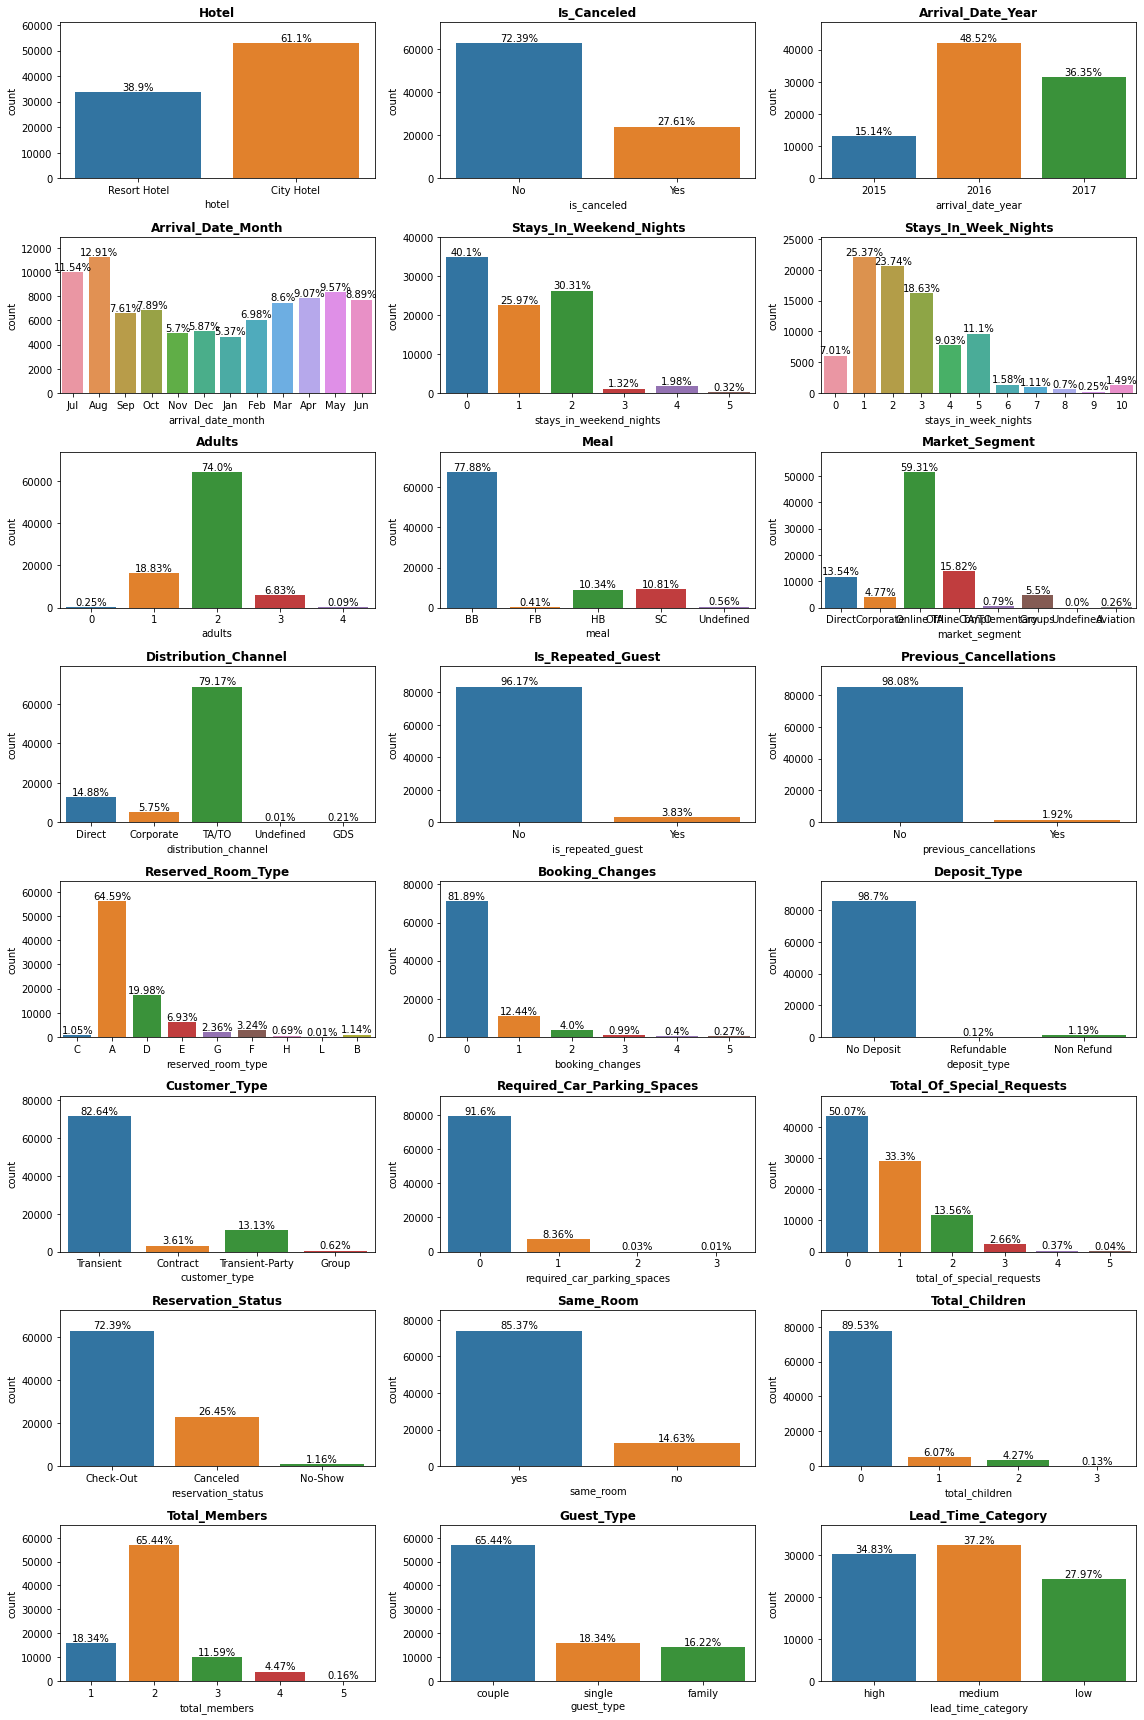

In [ ]:
# Plotting the countplots for each target variable
plt.figure(figsize=(16,r*3))
for n,column in enumerate(target):
  plot = plt.subplot(r,3,n+1)
  sns.countplot(new_df[column]).margins(y=0.15)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()
  annot_percent(plot)

In [ ]:
#some features excluded here
print(exclude)

['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'country', 'agent', 'adr', 'reservation_status_date', 'total_nights', 'money_per_person']


In [ ]:
#Our target features
print(target)

['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'reserved_room_type', 'booking_changes', 'deposit_type', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'same_room', 'total_children', 'total_members', 'guest_type', 'lead_time_category']


**Point of concern**: The data has been collected for 3 years. There is a steep rise in bookings between 2015 and 2016 and then a drop between 2016 and 2017. This kind of fluctuation may not be normal. This needs to be further investigated

Due to the anomaly seen in the trend of bookings over the years, we would like to check the months for which the data was collected for each of the years

In [ ]:
#Checking the months for which the data was collected for each year
months_per_year = pd.DataFrame(df.groupby('arrival_date_year')['arrival_date_month'].value_counts())
months_per_year

arrival_date_month
arrival_date_year arrival_date_month                    
2015              September                         5109
                  October                           4951
                  August                            3883
                  December                          2913
                  July                              2774
                  November                          2337
2016              October                           6196
                  May                               5475
                  April                             5425
                  September                         5391
                  June                              5290
                  August                            5055
                  March                             4819
                  July                              4560
                  November                          4434
                  February                          3884
                  December                          3846
                  January                           2248
2017              May                               6305
                  April                             5653
                  June                              5639
                  July                              5310
                  March                             4949
                  August                            4923
                  February                          4168
                  January                           3673

Only 8 months of data was collected in 2017.Data collection started only in July, 2015 and ended in August, 2017.

Hence, we can see that only 6 months of data was collected in 2015 analysis, such as the most popular month for booking either hotel, will lose significance. The only common months across the three years of data are July and August.

Observations:
1. More than 60% of the bookings are of City Hotel.
2. Nearly one third of the bookings are cancelled.
3. There was an annual 218.5% rise in hotel bookings in 2016 which dropped down by 25.2% in 2017.
4. August is the most preffered month by people for bookings.
5. Most preferred meal is BB(Bread and Breakfast.
6. Most of the customers are coming through Online.
7. Top distribution chanell is TA/TO.
8. Only 3.82% of the guests are arriving again.
9. People who cancel bookings do not really book again.
10. Room type A is the most preferred one.
11. People donot want to pre-deposit the money.
12. More than 90% of people donot require any parking space.
13. Around 15% of guests are not assigned with their preferred room.
14. Around 10% of the guests arrive with children.
15. Atleast 2 people arrive 80% of the times.
16. Around 15% of the people visit with their family.

##**Hotelwise Analysis**

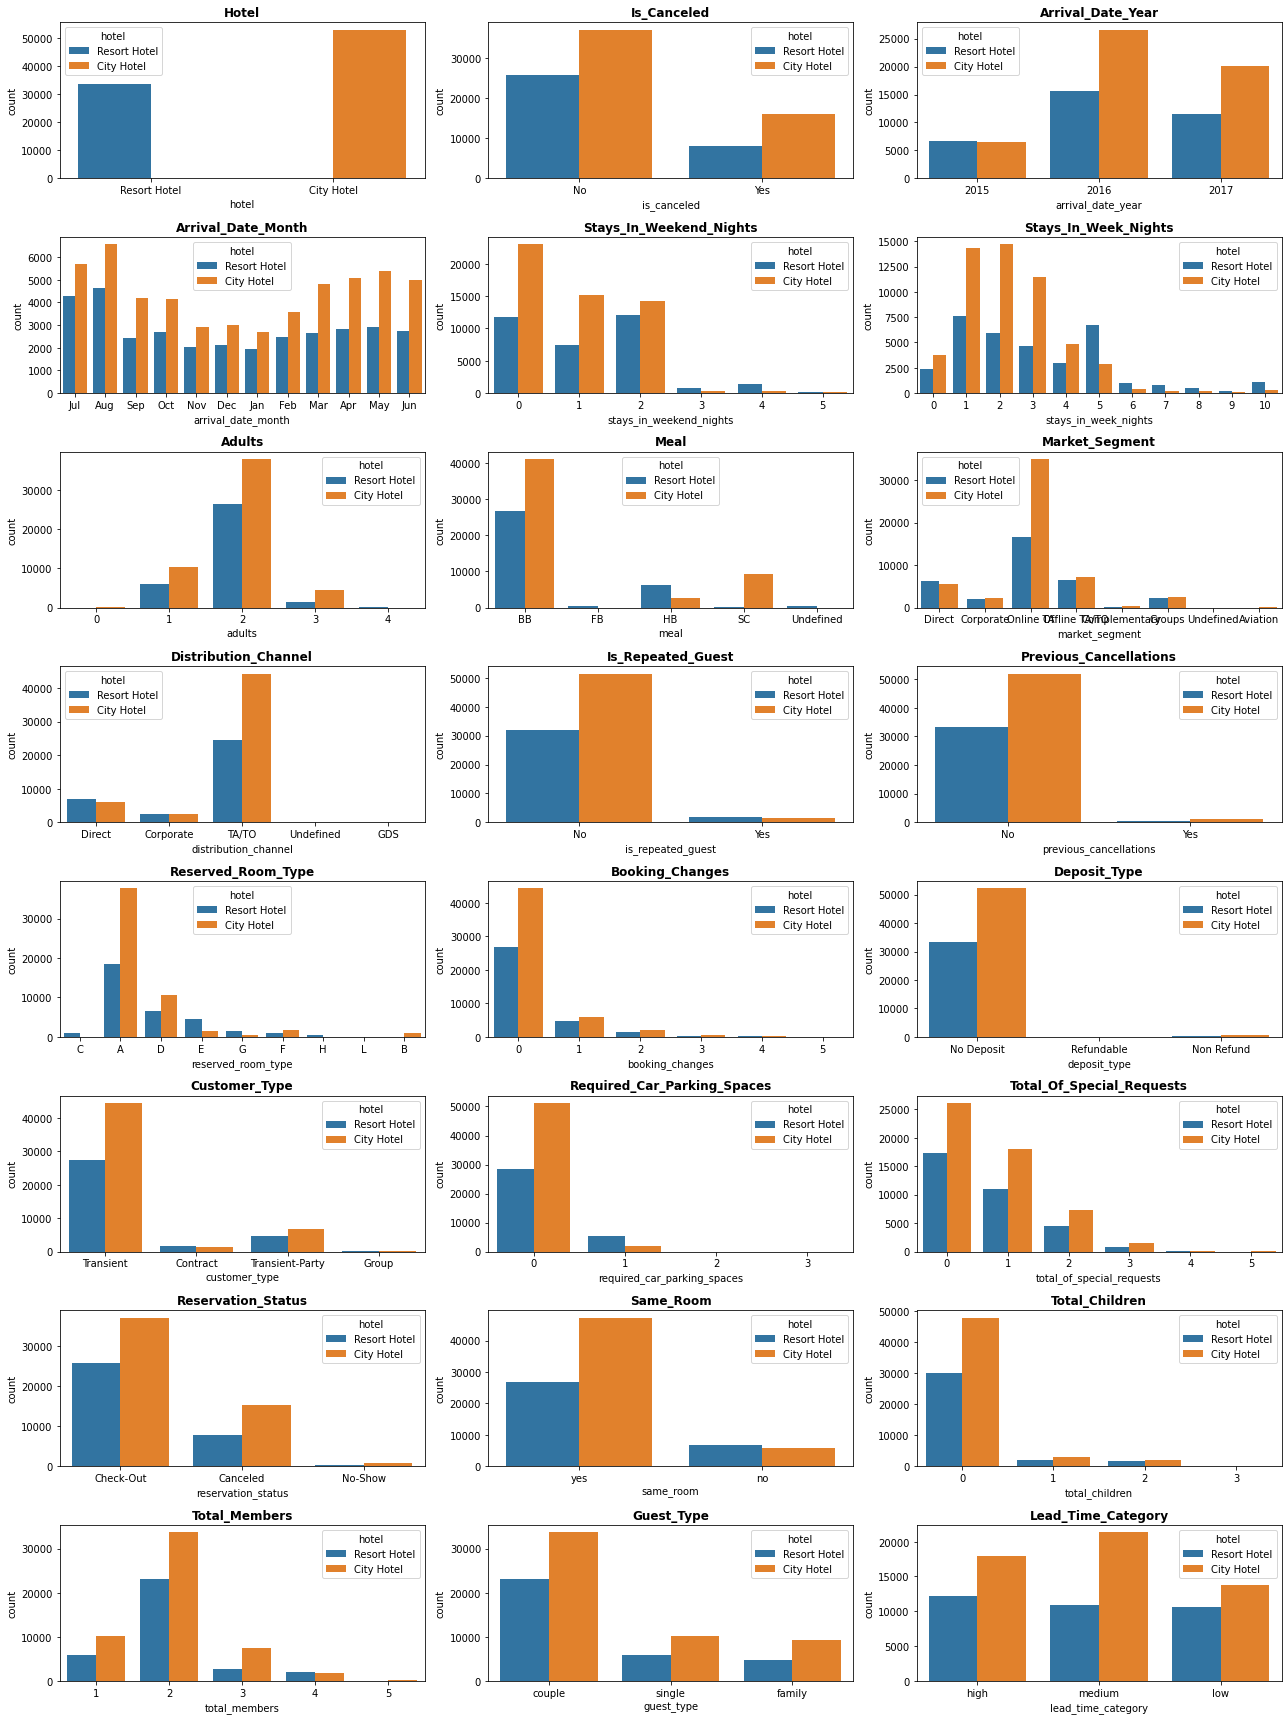

In [ ]:
# Hotelwise Comparative Analysis
plt.figure(figsize=(18,r*3))
for n,column in enumerate(target):
  plot = plt.subplot(r,3,n+1)
  sns.countplot(new_df[column],x= column, hue=new_df['hotel'])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

###**Observations:**

1. **Hotel-** City Hotel-61.1% and Resort Hotel-38.9% of bookings So, People prefer City Hotel more as compared to Resort Hotel.
2. **Is_canceled**-From the data we can say that majority of the booking were not canceled. Only 27.54% booking were canceled.Cancellation % for city hotel is slightly more than that of city hotel.
3. **Arrival_date_year**=The number of bookings rising between 2015 and 2016 and then dropping again next year is due to incomplete data collection in 2015 and 2017.
4. **Arrival_date_month**-August is most preferred in graph but due to the above reason, checking for bookings per month over the years to check for popular months loses significance.
5. **Adults**-Couple (or 2 adults)(73.96%) is the most popular visitor types. So hotels can make plans accordingly
6. **Meal**-Most of the people prefer bed breakfast BB(77.84%) as their meal type during the stay in both City Hotel and Resort Hotel.
7. **Market segment** -The main source of the Booking is coming through 'Online TA'(59.13%) or online websites of the hotel.Online Booking plays crucial role in Hotel Booking.
8. **Distribution channel**-From Distribution channel we can observe most of the people prefer more into TA/TO 79.15%.
9. **Is_repeated_guest**-Only 3.82% of the guests are arriving again.
10. **Deposite_type**-People donot want to pre-deposit the money.
11. **Reserved_room_type**-The 'A' room type is the most popular among the clients, with 53.06% of the reservations. 
12. **Assigned_room_type**-The room type 'A' was most assigned by 53.06% people.
13. **Customer_type**-Transients(82.41%) are the most common customer type.
14. **Reservation_status**-72.47% of guest check-out only 26.36% reservation are canceled by guests.
15. **Same_room**-Customer reserved room and get same assigned room percentage is high(85.11%).City hotel assigns the same room as reserved by the guests most of the time. While Resort hotel fails to do so more or more than 25% of guests.
16. **Total_nights**-For Short stay people choose City Hotel.For long stay people choose Resort Hotel. Most people stay for one, two, or three. More than 60% of guests come under these three options.People who stay for more than 4 nights prefer Resort hotel the most.
17. **Stay_in_weekend_nights,Booking_changes, Required_car_parking_spaces,total_of_special_request,Total_children**-In this features City hotel percentage is high.


##**Bivariate Analysis**

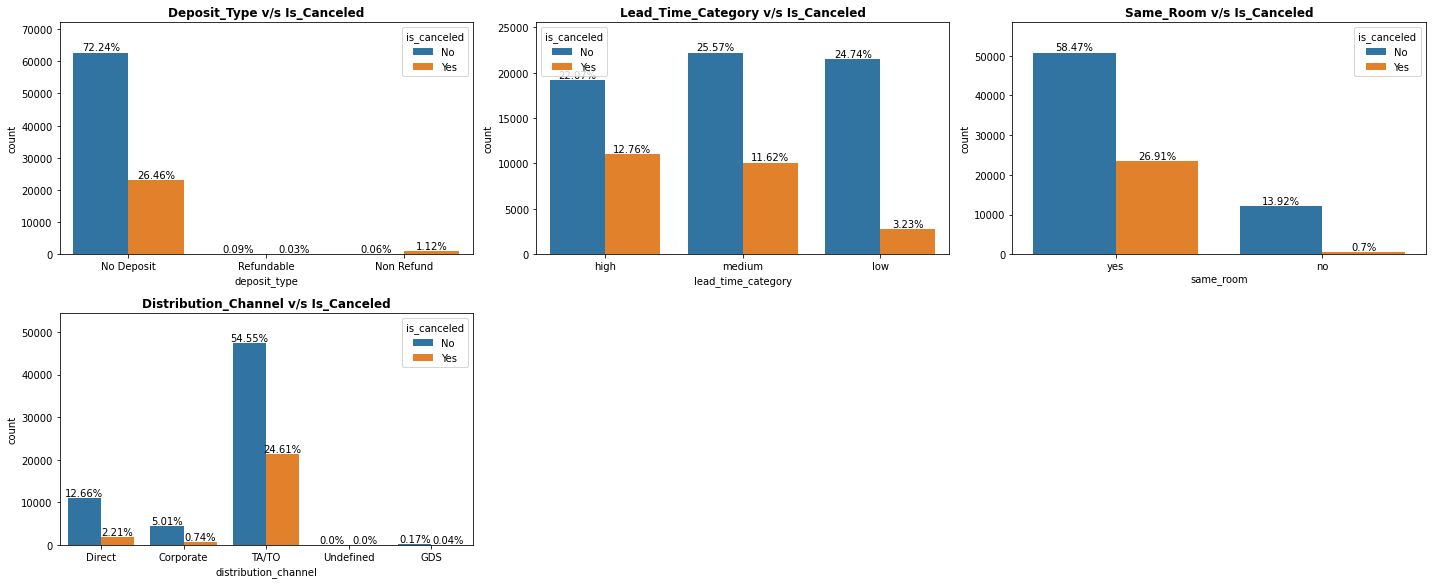

In [ ]:
#Booking Cancellation Analysis by redefining target variables
target = ['deposit_type','lead_time_category','same_room','distribution_channel']
plt.figure(figsize=(20,r*4))
for n,column in enumerate(target):
  plot = plt.subplot(r,3,n+1)
  sns.countplot(data=new_df,x= column, hue='is_canceled')
  plt.title(f'{column.title()} v/s Is_Canceled',weight='bold')
  plt.margins(y=0.15)
  plt.tight_layout()
  annot_percent(plot)

**Observations:**
1. Most of the bookings are cancelled where there was no deposit made. That's because most of people didn't make deposits. So it's not a reason for cancellation.
2. If the lead time is low, less people cancel the bookings. But If the bookings are made more than 15 days in advance, there are comparatively high chances of cancellation. We can conclude this because the data is almost equally distributed among low medium and high lead time.
3. Not having assigned the same room is not a reason for cancellation. As only 0.7% of bookings were cancelled when the same room was not assigned.
4. TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 24.54% likely to get cancelled.

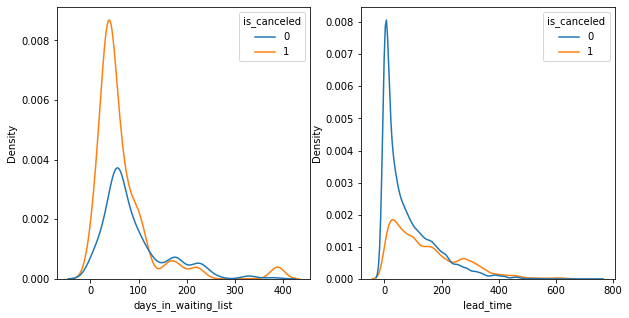

In [ ]:
#That may be longer waiting period or longer lead time causes the cancellation of bookings, let us check that
waiting_bookings = df[df['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = df['lead_time'], hue = df['is_canceled'])
plt.show()

Most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period of less than 150 days. Hence this shows that waiting period has no effect on cancellation of bookings.

Also, lead time has no effect on cancellation of bookings, as both curves of cancellation and not cancellation are similar for lead time too.

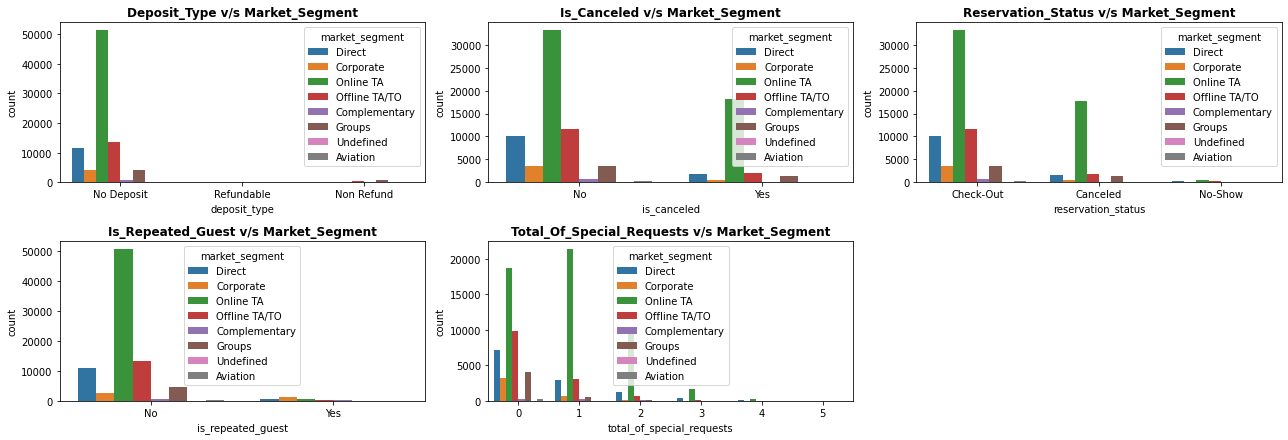

In [ ]:
#Market Segment Analysis
plt.figure(figsize=(18,r*3))
for n,column in enumerate(['deposit_type','is_canceled','reservation_status','is_repeated_guest','total_of_special_requests']):
  plot = plt.subplot(r,3,n+1)
  sns.countplot(data=new_df,x= column, hue='market_segment')
  plt.title(f'{column.title()} v/s Market_Segment',weight='bold')
  plt.tight_layout()

**Observations**:
1. Most of the booking either in the No deposite status or canceled status or in check-out status are done by the online travel agencies (online TA). The ratio of cancelations to bookings is also the highest for Online TA.
2. highest proportion of non-repeated guest is from the Online TA segment.
3. Online TA type of market segment has disproportionality high special requests.

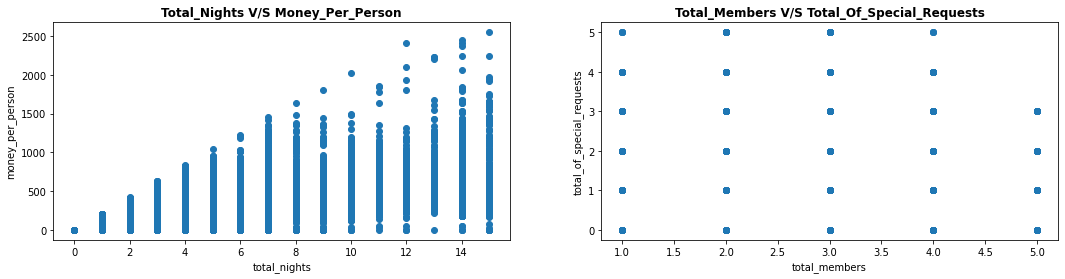

In [ ]:
# To visualize optimal length of stay
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plt.scatter(data=new_df,x= 'total_nights',y='money_per_person')
plt.title('total_nights v/s money_per_person'.title(),weight='bold')
plt.xlabel('total_nights')
plt.ylabel('money_per_person')

# To visualize relation between special request and total members arrived
plt.subplot(1,2,2)
plt.scatter(data=new_df,x= 'total_members',y='total_of_special_requests')
plt.title('total_members v/s total_of_special_requests'.title(),weight='bold')
plt.xlabel('total_members')
plt.ylabel('total_of_special_requests')
plt.show()

Observations:
1. 3 Nights seems economical for stay.
2. Number of Special requests seems have very less related with total members. So we can simply take the average of it to get the number of special requests.

##**Multivariate Analysis**

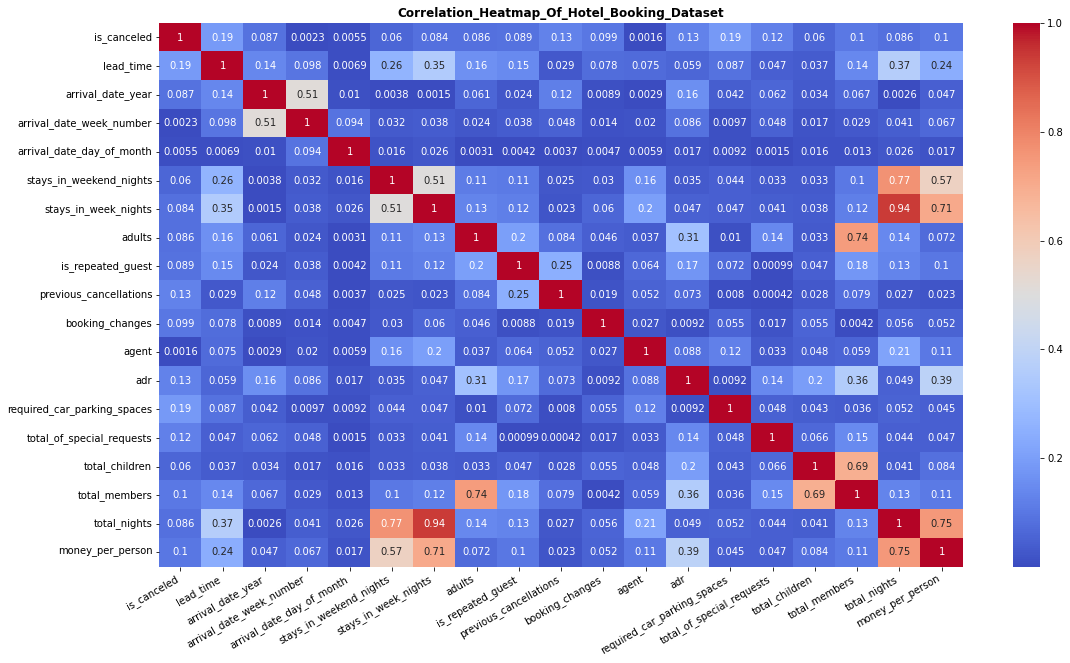

In [ ]:
# Correlation Analysis
plt.figure(figsize=(18,10))
plot = sns.heatmap(abs(new_df.replace(['Yes','No'],[1,0]).corr()), annot=True,cmap='coolwarm')
plt.title('Correlation_Heatmap_Of_Hotel_Booking_Dataset', weight='bold')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables.

**Observations:**
1. In the heatmap, It shows some high correlations between few variables, thats because we have created some new columns from existing columns and have not dropped it later.
2. Total special requests depends more on total members arrived.
3. Average daily revenue depends more on total special requests and total members as compared to other variables.


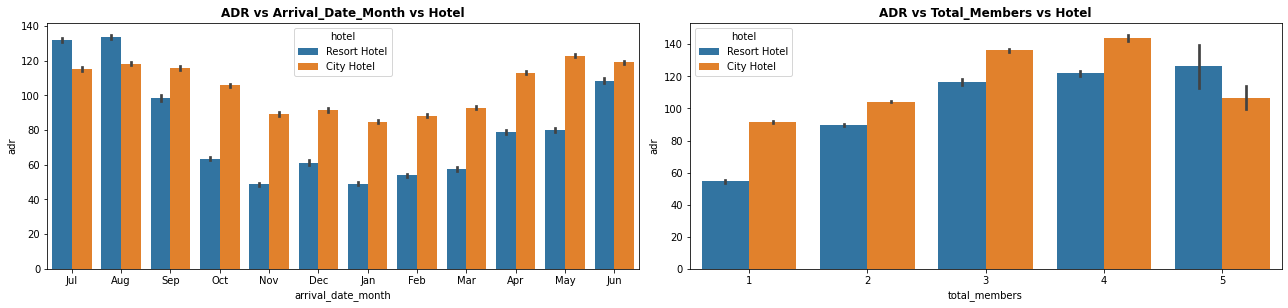

In [ ]:
# ADR(Average Daily Rate) based on arrival_month and total_members for both hotels
plt.figure(figsize=(18,r*4))
for n,col in enumerate(['arrival_date_month','total_members']):
  plot = plt.subplot(r,2,n+1)
  sns.barplot(x=col, y='adr', hue='hotel', dodge=True, data=new_df)
  plt.title(f'ADR vs {col.title()} vs Hotel', weight='bold')
  plt.tight_layout()

Observations:
1. Average Daily Revenue rises from jan to Aug then again falls down from Aug to Dec.
2. Resort hotel leads in ADR only during the peak months July and August. Rest all months City hotel has high ADR.
3. April to September is the semester with high ADR for both hotels
4. ADR for Resort hotel is directly prortional to total members.
5. Seems like City hotel is giving some discount offers for members more than 4 because the ADR has drastic decrease for members more than 4.

In [ ]:
# Average lead_time
print(f'Average time taken for customer arrival after making reservation : {int(new_df.lead_time.mean())} days')
# Average nights spent by visitors
print(f'Average nights spent by visitors: {int(new_df.total_nights.mean())}')
# Average money spent by visitors
print(f'Average money spent by visitors: {int(new_df.money_per_person.mean())} Bucks')

Average time taken for customer arrival after making reservation : 77 days
Average nights spent by visitors: 3
Average money spent by visitors: 186 Bucks


##**Some Questions Answered from dataset**

###**1.What is the best time to book the hotel?**

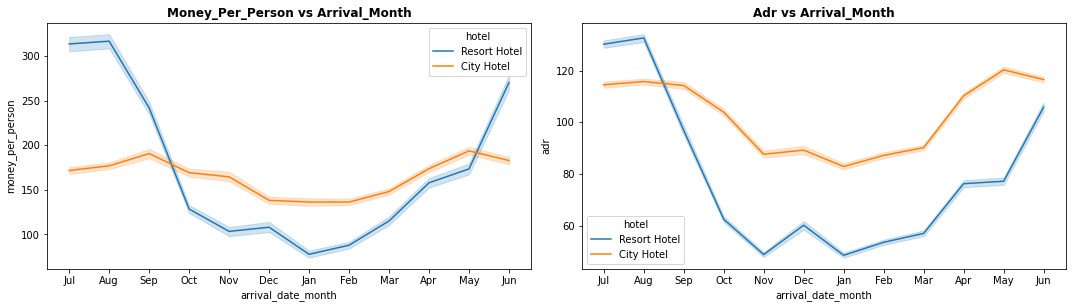

In [ ]:
plt.figure(figsize=(15,r*4))
for n,col in enumerate(['money_per_person','adr']):
  plot = plt.subplot(r,2,n+1)
  sns.lineplot(data = df_not_cancelled, x = 'arrival_date_month', y =col, hue = 'hotel')
  plt.title(f'{col.title()} vs Arrival_Month', weight='bold')
  plt.tight_layout()

Observations:
1. Best time to book a hotel is in January. As money spent is lesser.
2. City hotel seems consistent with the price throughout the year.

###**2.Which agent makes highest no of bookings?**

In [ ]:
top_agents = pd.DataFrame(df_not_cancelled['agent'].value_counts().reset_index().head())
top_agents.columns = ['agent','bookings']
top_agents

,agent,bookings
0,9,17193
1,0,10566
2,240,8074
3,7,2858
4,14,2759


Agent no. 9 has made most no. of bookings.

###**3.Which country most guest come and they did not cancel the hotel?**

In [ ]:
#see below the guest data, they did not cancle the hotel
guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
guests.columns = ['country', 'No of guests']
guests.head(5)

,country,No of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067


PRT, GBR and FRA, ESP and DEU are the top countries from most guests come, more than 80% come from these 5 countries and they did not cancle the hotel.

###**4.Which distribution channel gives you the highest adr?**

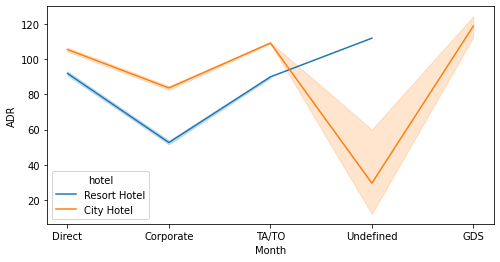

In [ ]:
#higher adr deals comes via
plt.figure(figsize=(8,4))
sns.lineplot(x='distribution_channel', y='adr', hue='hotel', data= new_df)
plt.xlabel("Month")
plt.ylabel("ADR")
plt.show()

For hotels higher adr deals come via GDS channel, so hotels should increase their popularity on this channel.

###**5.Which room type is in most demand and which room type generated highest adr?**

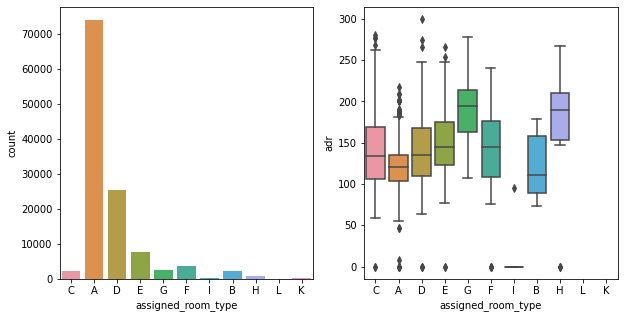

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

grp_by_room = df.groupby('assigned_room_type')
# d['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = df['assigned_room_type'])
sns.boxplot(ax = axes[1], x = df['assigned_room_type'], y = df[0:1200]['adr'])
plt.show()

Most demanded room type is A, but better adr rooms are of type H, G and C also. Hotels should increase the no. of room types A and H to maximise revenue.

###**6.What is the Optimal length of stay to get better price?**

In [ ]:
# Calculating the total number of stays

total_nights = df_not_cancelled['stays_in_weekend_nights']+ df_not_cancelled['stays_in_week_nights']
x7=total_nights.value_counts().index[:10]
y7=total_nights.value_counts()[:10]/total_nights.value_counts().sum()*100

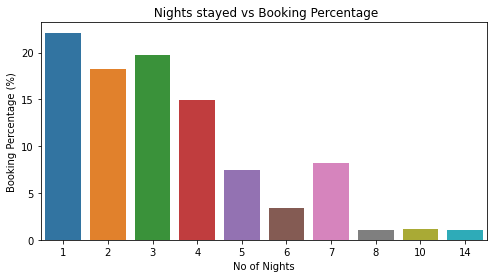

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_xlabel('No of Nights')
ax.set_ylabel('Booking Percentage (%)')
ax.set_title(' Nights stayed vs Booking Percentage')
sns.barplot(x7,y7) 

For shorter stays the adr(average daily rate varies greatly) but for longer stays (> 15 days) adr is comparatively very less. Therefore, customers can get better deal for longer stays more than 15 days.Most people prefer to stay at the hotels of <=5 days, so less then 5 days stay in hotel gets the better price.

###**7.What is the best time of year to book a hotel room is based on ADR?**

Text(0, 0.5, 'ADR')

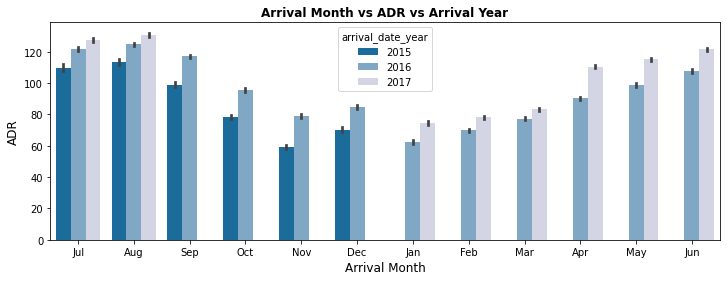

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x='arrival_date_month', y='adr', hue='arrival_date_year', dodge=True, palette= 'PuBu_r', data=new_df)
plt.title('Arrival Month vs ADR vs Arrival Year', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('ADR', fontsize=12)

In [ ]:
# Average ADR of different months and year.
adr_month_year= new_df.groupby(['arrival_date_month','arrival_date_year'])['adr'].mean()
adr_month_year

arrival_date_month  arrival_date_year
Apr                 2016                  90.166800
                    2017                 110.507401
Aug                 2015                 113.498566
                    2016                 124.642321
                    2017                 130.863220
Dec                 2015                  70.334688
                    2016                  84.584797
Feb                 2016                  69.747036
                    2017                  78.073893
Jan                 2016                  62.569875
                    2017                  74.670917
Jul                 2015                 109.886418
                    2016                 121.549178
                    2017                 127.572659
Jun                 2016                 107.586701
                    2017                 121.548288
Mar                 2016                  77.363565
                    2017                  83.323014
May                 2016  

In Graph we can see that 2016 seems to be the year where hotel booking is at its highest and In our analysis some data is missing. We also see an increasing trend in booking around the middle of the year, with August being the highest. Summer ends around August, followed straight by autumn. It seems that summer period is a peak period for hotel booking.

###**7.Which hotel type require parking space?**

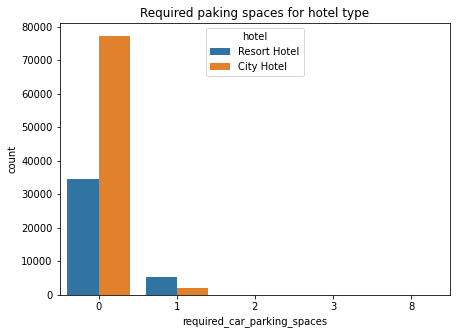

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x="required_car_parking_spaces", data = df,hue='hotel')
plt.title('Required paking spaces for hotel type');

Both hotel types do not required parking spaces, but resort hotels are more likely to be required to have 1 paking space compared to city hotel.

###**8.How do special requests and required car parking spaces affect ADR?**

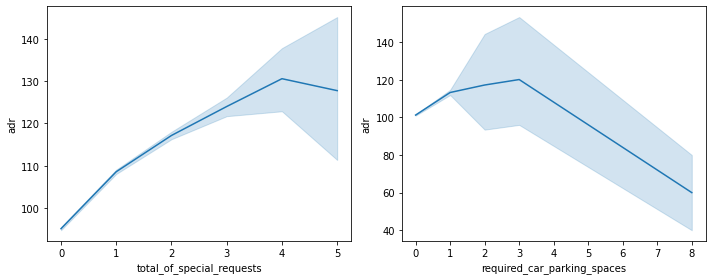

In [ ]:
fig,axes=plt.subplots(1,2,sharey=False,figsize=(10,4))
sns.lineplot(data=df,x='total_of_special_requests',y='adr',ax=axes[0])
sns.lineplot(data=df,x='required_car_parking_spaces',y='adr',ax=axes[1])
plt.tight_layout();

As the number of special requests increase ADR also increases.

As the number of car parking spaces increse ADR also increases slightly.

#**Conclusion**

1. Top Hotel - City Hotel. Top meal - Bread and Breakfast. Top Agent - Agent No. 9. Top room type - A
2. One out of every three bookings are cancelled.
3. People prefer to tour more in August.
4. Most preferred meal is BB(Bread and Breakfast).
5. Online marketing is the best way to attract customers.
6. People donot want to pre-deposit the money for booking.
7. Only 10% of people require parking space.
8. Most of the visitors are couples.
9. Resort hotel is preferred mostly for longer stay,day time stays. and when the parking space is needed.
10. More than 15 days advance bookings have high chances of cancellation.
11. Assigning different room is not a reason for cancellation.
12. Direct bookings have very less cancellation%.
13. Best time to book a hotel is in January.
14. Average days in advance booking : 77 days
15. Average nights spent by visitors: 3
16. Most visitors are from these countries: Portugal, Britain, France, Spain and Germany.
17. Total Special requests and the revenue depends more on total members arrived.

#**Some Suggestions**

1. Hotels can promote their business online as most of the Bookings are coming 
from online portals.
2. Special discount can be given to repeated guests.Hotel has very few repeated guest, feedback can be collected to plan strategies accordingly.
3. City Hotel can come up with special plans for long staying guests.
4. Resort Hotel can come up with special plans for short staying guests.Because Resort hotel is preferred mostly for longer stay,day time stays. and when the parking space is needed.As the number of children increases, the preference for Resort Hotel increases.Mostly guests stay for less than 5 days in hotel and for longer stays Resort hotel is preferred.
5. Hotels need to do marketing and give special incentives for direct bookings as these may establish personal one to one relationships promoting customer loyalty.
6. Majority of the hotels booked are city hotel. Definitely need to spend the most targeting fund on those hotel.
7. We also realise that the high rate of cancellations can be due high no deposit policies.
8. We should also target months between May to Aug. Those are peak months due to the summer period.July-August are the most busier and profitable months for both of hotels.
9. Majority of the guests are from Western Europe. We should spend a significant amount of our budget on those area.
10. Given that we do not have repeated guests, we should target our advertisement on guests to increase returning guests.
11. It is quite clear most customers travel in pairs and bringing children or babies along are very rare so the hotels could advertise in ways that attract couples more and also business travellers.
12. More number of people in guests results in more number of special requests.
13. Bookings made via complementary market segment and adults have on average high no. of special request.
14. Most preferred meal is BB(Bread and Breakfast).so Most people eat their breakfast at hotel and for lunch and dinner they may go to eateries so here we can collaborate with different eateries and we can refer people to the eateries of their preference. And we can provide some coupon code to the customers and whenever they use our coupon code at any eateries we will get some commission in return.
15. For customers, generally the longer stays (more than 15 days) can result in better deals in terms of low adr.


